In [5]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")

In [6]:
# Load Dataset
hotel_df = pd.read_csv('Data\Zomato Restaurant names and Metadata.csv')
review_df = pd.read_csv('Data\Zomato Restaurant reviews.csv')

In [7]:
# Dataset Rows(Observation) & Columns count(Feature)
print(f'Total observation and feature for restaurant: {hotel_df.shape}')
print(f'Total observation and feature for review: {review_df.shape}')

Total observation and feature for restaurant: (105, 6)
Total observation and feature for review: (10000, 7)


In [8]:
print("Hotel dataset",hotel_df.columns)
print("review dataset",review_df.columns)

Hotel dataset Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')
review dataset Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [9]:
hotel_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [10]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [11]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [12]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [13]:
hotel_df.isnull().sum()/hotel_df.shape[0]*100

Name            0.000000
Links           0.000000
Cost            0.000000
Collections    51.428571
Cuisines        0.000000
Timings         0.952381
dtype: float64

In [14]:
review_df.isnull().sum()/review_df.shape[0]*100

Restaurant    0.00
Reviewer      0.38
Review        0.45
Rating        0.38
Metadata      0.38
Time          0.38
Pictures      0.00
dtype: float64

In [15]:
print("Null value in hotel df:",hotel_df.duplicated().sum())
print("Null value in review df:",review_df.duplicated().sum())

Null value in hotel df: 0
Null value in review df: 36


**Restaurant DataSet**
* There are 105 total observation with 6 different features.
* Feature like collection and timing has null values.
* There is no duplicate values i.e., 105 unique data.
* Feature cost represent amount but has object data type because these values are separated by comma ','.
* Timing represent operational hour but as it is represented in the form of text has object data type.

**Review DataSet**
* There are total 10000 observation and 7 features.
* Except picture and restaurant feature all others have null values.
* There are total of 36 duplicate values for two restaurant - American Wild Wings and Arena Eleven, where all these duplicate values generally have null values.
* Rating represent ordinal data, has object data type should be integer.
* Timing represent the time when review was posted but show object data time, it should be converted into date time.


### Data clening and feature extraction

In [16]:
hotel_df['Cost'] = hotel_df['Cost'].str.replace(",","").astype("int")

In [17]:
#top 5 costlier restaurant
hotel_df.sort_values('Cost', ascending = False)[['Name','Cost']][:5]

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800


In [18]:
#top 5 economy restaurant
hotel_df.sort_values('Cost', ascending = False)[['Name','Cost']][-5:]

,Name,Cost
85,Momos Delight,200
29,Hunger Maggi Point,200
101,Sweet Basket,200
89,Mohammedia Shawarma,150
23,Amul,150


In [19]:
#hotels that share same price
hotel_dict = {}
amount = hotel_df.Cost.values.tolist() 

#adding hotel name based on the price by converting it into list
for price in amount:
    # Get all the rows that have the current price
    rows = hotel_df[hotel_df['Cost'] == price]
    hotel_dict[price] = rows["Name"].tolist()

#converting it into dataframe
same_price_hotel_df=pd.DataFrame.from_dict([hotel_dict]).transpose().reset_index().rename(
    columns={'index':'Cost',0:'Name of Restaurants'})

#alternate methode to do the same 
#same_price_hotel_df = hotel.groupby('Cost')['Name'].apply(lambda x: x.tolist()).reset_index()

#getting hotel count
hotel_count = hotel_df.groupby('Cost')['Name'].count().reset_index().sort_values(
    'Cost', ascending = False)

#merging together
same_price_hotel_df = same_price_hotel_df.merge(hotel_count, how = 'inner', 
                        on = 'Cost').rename(columns = {'Name':'Total_Restaurant'})

#max hotels that share same price
same_price_hotel_df.sort_values('Total_Restaurant', ascending = False)[:5]

,Cost,Name of Restaurants,Total_Restaurant
4,500,"[eat.fit, KFC, Kritunga Restaurant, Karachi Ba...",13
17,600,"[Behrouz Biryani, Karachi Cafe, Hyderabad Chef...",10
20,700,"[Marsala Food Company, Green Bawarchi Restaura...",8
2,1200,"[Over The Moon Brew Company, The Glass Onion, ...",7
8,400,"[Sardarji's Chaats & More, Hotel Zara Hi-Fi, P...",6


In [20]:
#hotels which has max price
same_price_hotel_df.sort_values('Cost', ascending = False)[:5]

,Cost,Name of Restaurants,Total_Restaurant
26,2800,[Collage - Hyatt Hyderabad Gachibowli],1
22,2500,[Feast - Sheraton Hyderabad Hotel],1
12,1900,"[10 Downing Street, Jonathan's Kitchen - Holid...",2
25,1800,[Cascade - Radisson Hyderabad Hitec City],1
27,1750,[Zega - Sheraton Hyderabad Hotel],1


In [21]:
# spliting the cusines and storing in list 
cuisine_value_list = hotel_df.Cuisines.str.split(', ')

In [22]:
# storing all the cusines in a dict 
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:  
            cuisine_dict[cuisine]=1 

In [23]:
# converting the dict to a data frame 
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(
    columns={'index':'Cuisine',0:'Number of Restaurants'})

In [24]:
#top 5 cuisine
cuisine_df.sort_values('Number of Restaurants', ascending =False)[:10]

,Cuisine,Number of Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15
7,Asian,15
20,Italian,14
9,Desserts,13
4,South Indian,9
29,Bakery,7


## Review Dataset

In [25]:
review_df['Rating'] = pd.to_numeric(review_df['Rating'],errors='coerce')

In [26]:
review_df['Reviewer_Total_Review']=review_df['Metadata'].str.split(',',expand=True)[0]
review_df['Reviewer_Followers']=review_df['Metadata'].str.split(',', expand=True)[1]

review_df['Reviewer_Total_Review'] = pd.to_numeric(review_df['Reviewer_Total_Review'].str.split(' ',expand=True)[0])
review_df['Reviewer_Followers'] = pd.to_numeric(review_df['Reviewer_Followers'].str.split(' ').str[1])


In [27]:
review_df['Time']=pd.to_datetime(review_df['Time'],errors='coerce')
review_df['Review_Year'] = pd.DatetimeIndex(review_df['Time']).year
review_df['Review_Month'] = pd.DatetimeIndex(review_df['Time']).month
review_df['Review_Hour'] = pd.DatetimeIndex(review_df['Time']).hour

In [28]:
# calculating the avg rating and the no of reviews they got


avg_hotel_rating  = review_df.groupby(by='Restaurant').agg({"Rating":"mean","Reviewer":"count"}).reset_index().rename({"Reviewer":"Total_Review"})

In [29]:
# top 5 hotel 
avg_hotel_rating.sort_values('Rating',ascending=False).head(5)

,Restaurant,Rating,Reviewer
3,AB's - Absolute Barbecues,4.88,100
11,B-Dubs,4.81,100
2,"3B's - Buddies, Bar & Barbecue",4.76,100
67,Paradise,4.70,100
35,Flechazo,4.66,100


In [30]:
avg_hotel_rating.sort_values("Rating",ascending=True).head(5)

,Restaurant,Rating,Reviewer
41,Hotel Zara Hi-Fi,2.400,100
10,Asian Meal Box,2.580,100
66,Pakwaan Grand,2.710,100
57,Mathura Vilas,2.820,100
14,Behrouz Biryani,2.825,100


In [31]:
review_df.sample()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
6048,PourHouse7,Suhas Reddy,"Been here on a Thursday afternoon, the place i...",3.0,"7 Reviews , 102 Followers",2019-03-28 15:12:00,0,7.0,102.0,2019.0,3.0,15.0


In [32]:
#Finding the most followed critic
most_followed_reviewer = review_df.groupby('Reviewer').agg({'Reviewer_Total_Review':'max',
      'Reviewer_Followers':'max', 'Rating':'mean'}).reset_index().rename(columns = {
          'Rating':'Average_Rating_Given'}).sort_values('Reviewer_Followers', ascending = False)
most_followed_reviewer[:5]

,Reviewer,Reviewer_Total_Review,Reviewer_Followers,Average_Rating_Given
5463,Satwinder Singh,186.0,13410.0,3.666667
1701,Eat_vth_me,60.0,13320.0,5.000000
5235,Samar Sardar,8.0,11329.0,3.500000
1787,Foodies Hyderabad,31.0,9494.0,4.500000
6229,Srinivas,34.0,7628.0,3.714286


In [33]:
merged_df = pd.merge(left=hotel_df,right=review_df,left_on="Name",right_on="Restaurant")

In [34]:
#Price point of restaurants
price_point = merged_df.groupby('Restaurant').agg({'Rating':'mean',
        'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})


In [35]:
#price point for high rated restaurants
price_point.sort_values('Rating',ascending = False)[:5]

,Restaurant,Rating,Price_Point
3,AB's - Absolute Barbecues,4.88,1500.0
11,B-Dubs,4.81,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.0
67,Paradise,4.70,800.0
35,Flechazo,4.66,1300.0


## Data vizualizaion

#### Hotel df

In [36]:
merged_df.select_dtypes(include='number').columns

Index(['Cost', 'Rating', 'Pictures', 'Reviewer_Total_Review',
       'Reviewer_Followers', 'Review_Year', 'Review_Month', 'Review_Hour'],
      dtype='object')

<Axes: xlabel='Cost', ylabel='Count'>

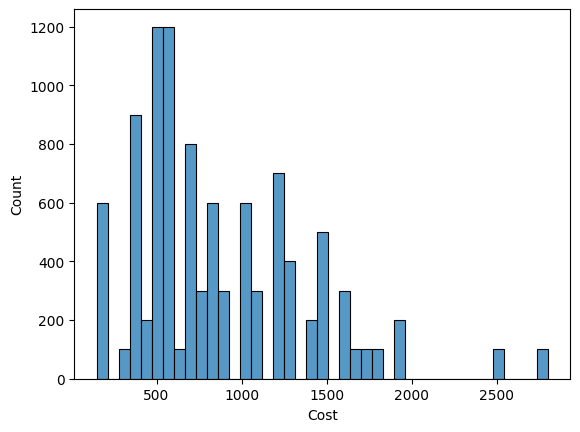

In [37]:
sns.histplot(merged_df["Cost"])

### Top 10 cuisines

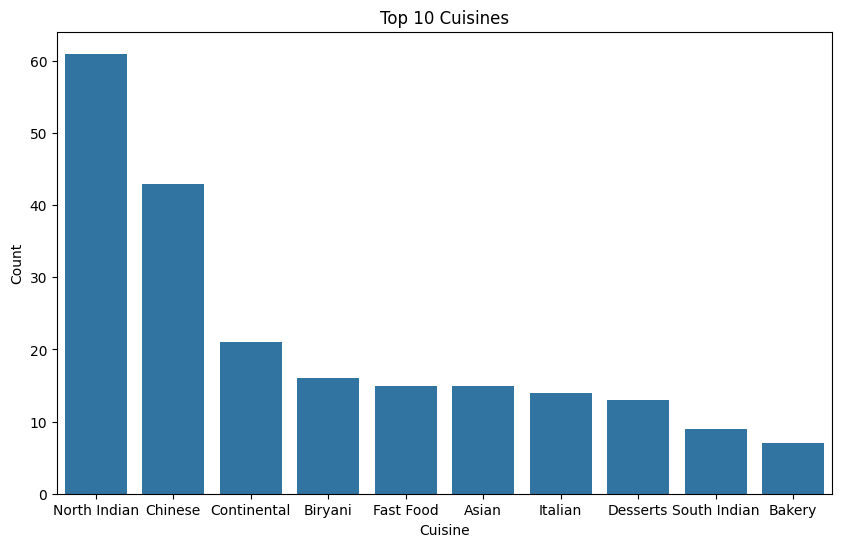

In [38]:

cuisine_value_list = hotel_df.Cuisines.str.split(', ')
# storing all the cusines in a dict 
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:  
            cuisine_dict[cuisine]=1 
# converting the dict to a data frame 
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(
    columns={'index':'Cuisine',0:'Number of Restaurants'})
top_10 = cuisine_df.sort_values(by='Number of Restaurants',ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_10['Cuisine'],y=top_10['Number of Restaurants'])
plt.title("Top 10 Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Count")
plt.show()


### top 10 hotel based on rating

In [39]:
top_10_hotel = avg_hotel_rating.sort_values('Rating',ascending=False).head(10)

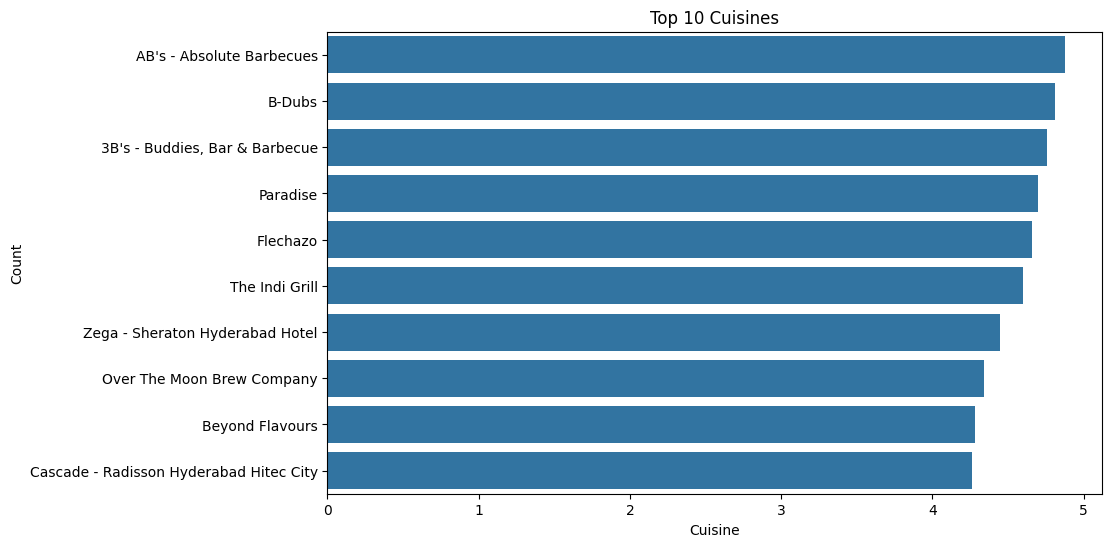

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(y=top_10_hotel['Restaurant'],x=top_10_hotel['Rating'])
plt.title("Top 10 Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Count")
plt.show()

In [41]:
# price point of top 10 resturent
price_of_top_10_hotel = price_point.sort_values(by='Rating',ascending=False).head(10)

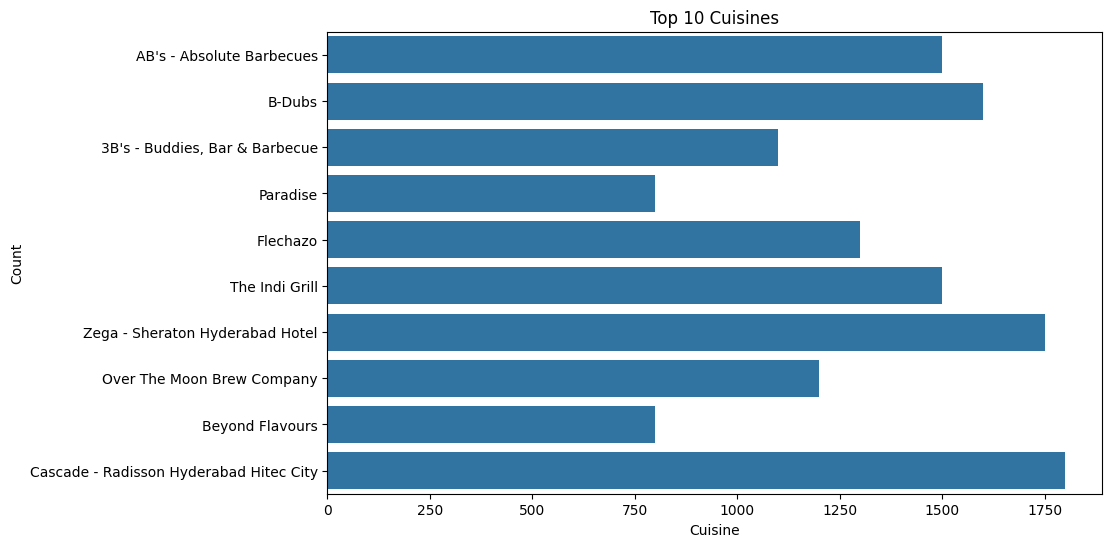

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(y=price_of_top_10_hotel['Restaurant'],x=price_of_top_10_hotel['Price_Point'])
plt.title("Top 10 Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Count")
plt.show()

### top 5 most selling food

In [43]:
# spliting the cusines and storing in list 
Collections_value_list = hotel_df.Collections.dropna().str.split(', ')

In [44]:
# storing all the cusines in a dict 
Collections_dict = {}
for collection in Collections_value_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:  
            Collections_dict[col_name]=1 

In [45]:
# converting the dict to a data frame 
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(
    columns={'index':'Tags',0:'Number of Restaurants'})

In [46]:
collection_list = Collections_df.sort_values('Number of Restaurants', 
                          ascending = False)['Tags'].tolist()[:5]

In [47]:
data = Collections_df.sort_values('Number of Restaurants', 
                          ascending = False)['Number of Restaurants'].tolist()[:5]



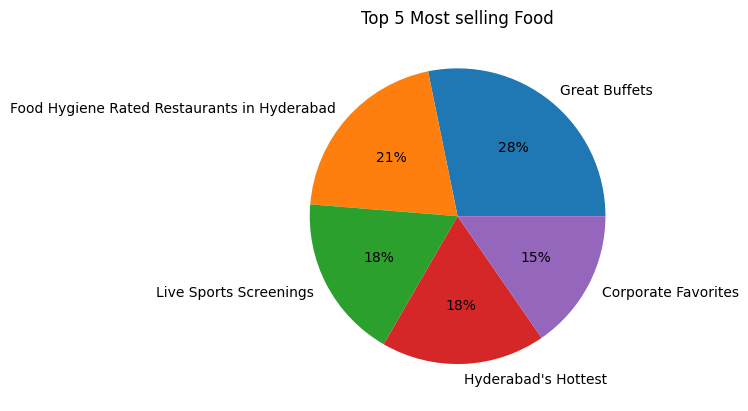

In [48]:
plt.pie(data,labels=collection_list,autopct='%.0f%%')
plt.title("Top 5 Most selling Food")
plt.show()

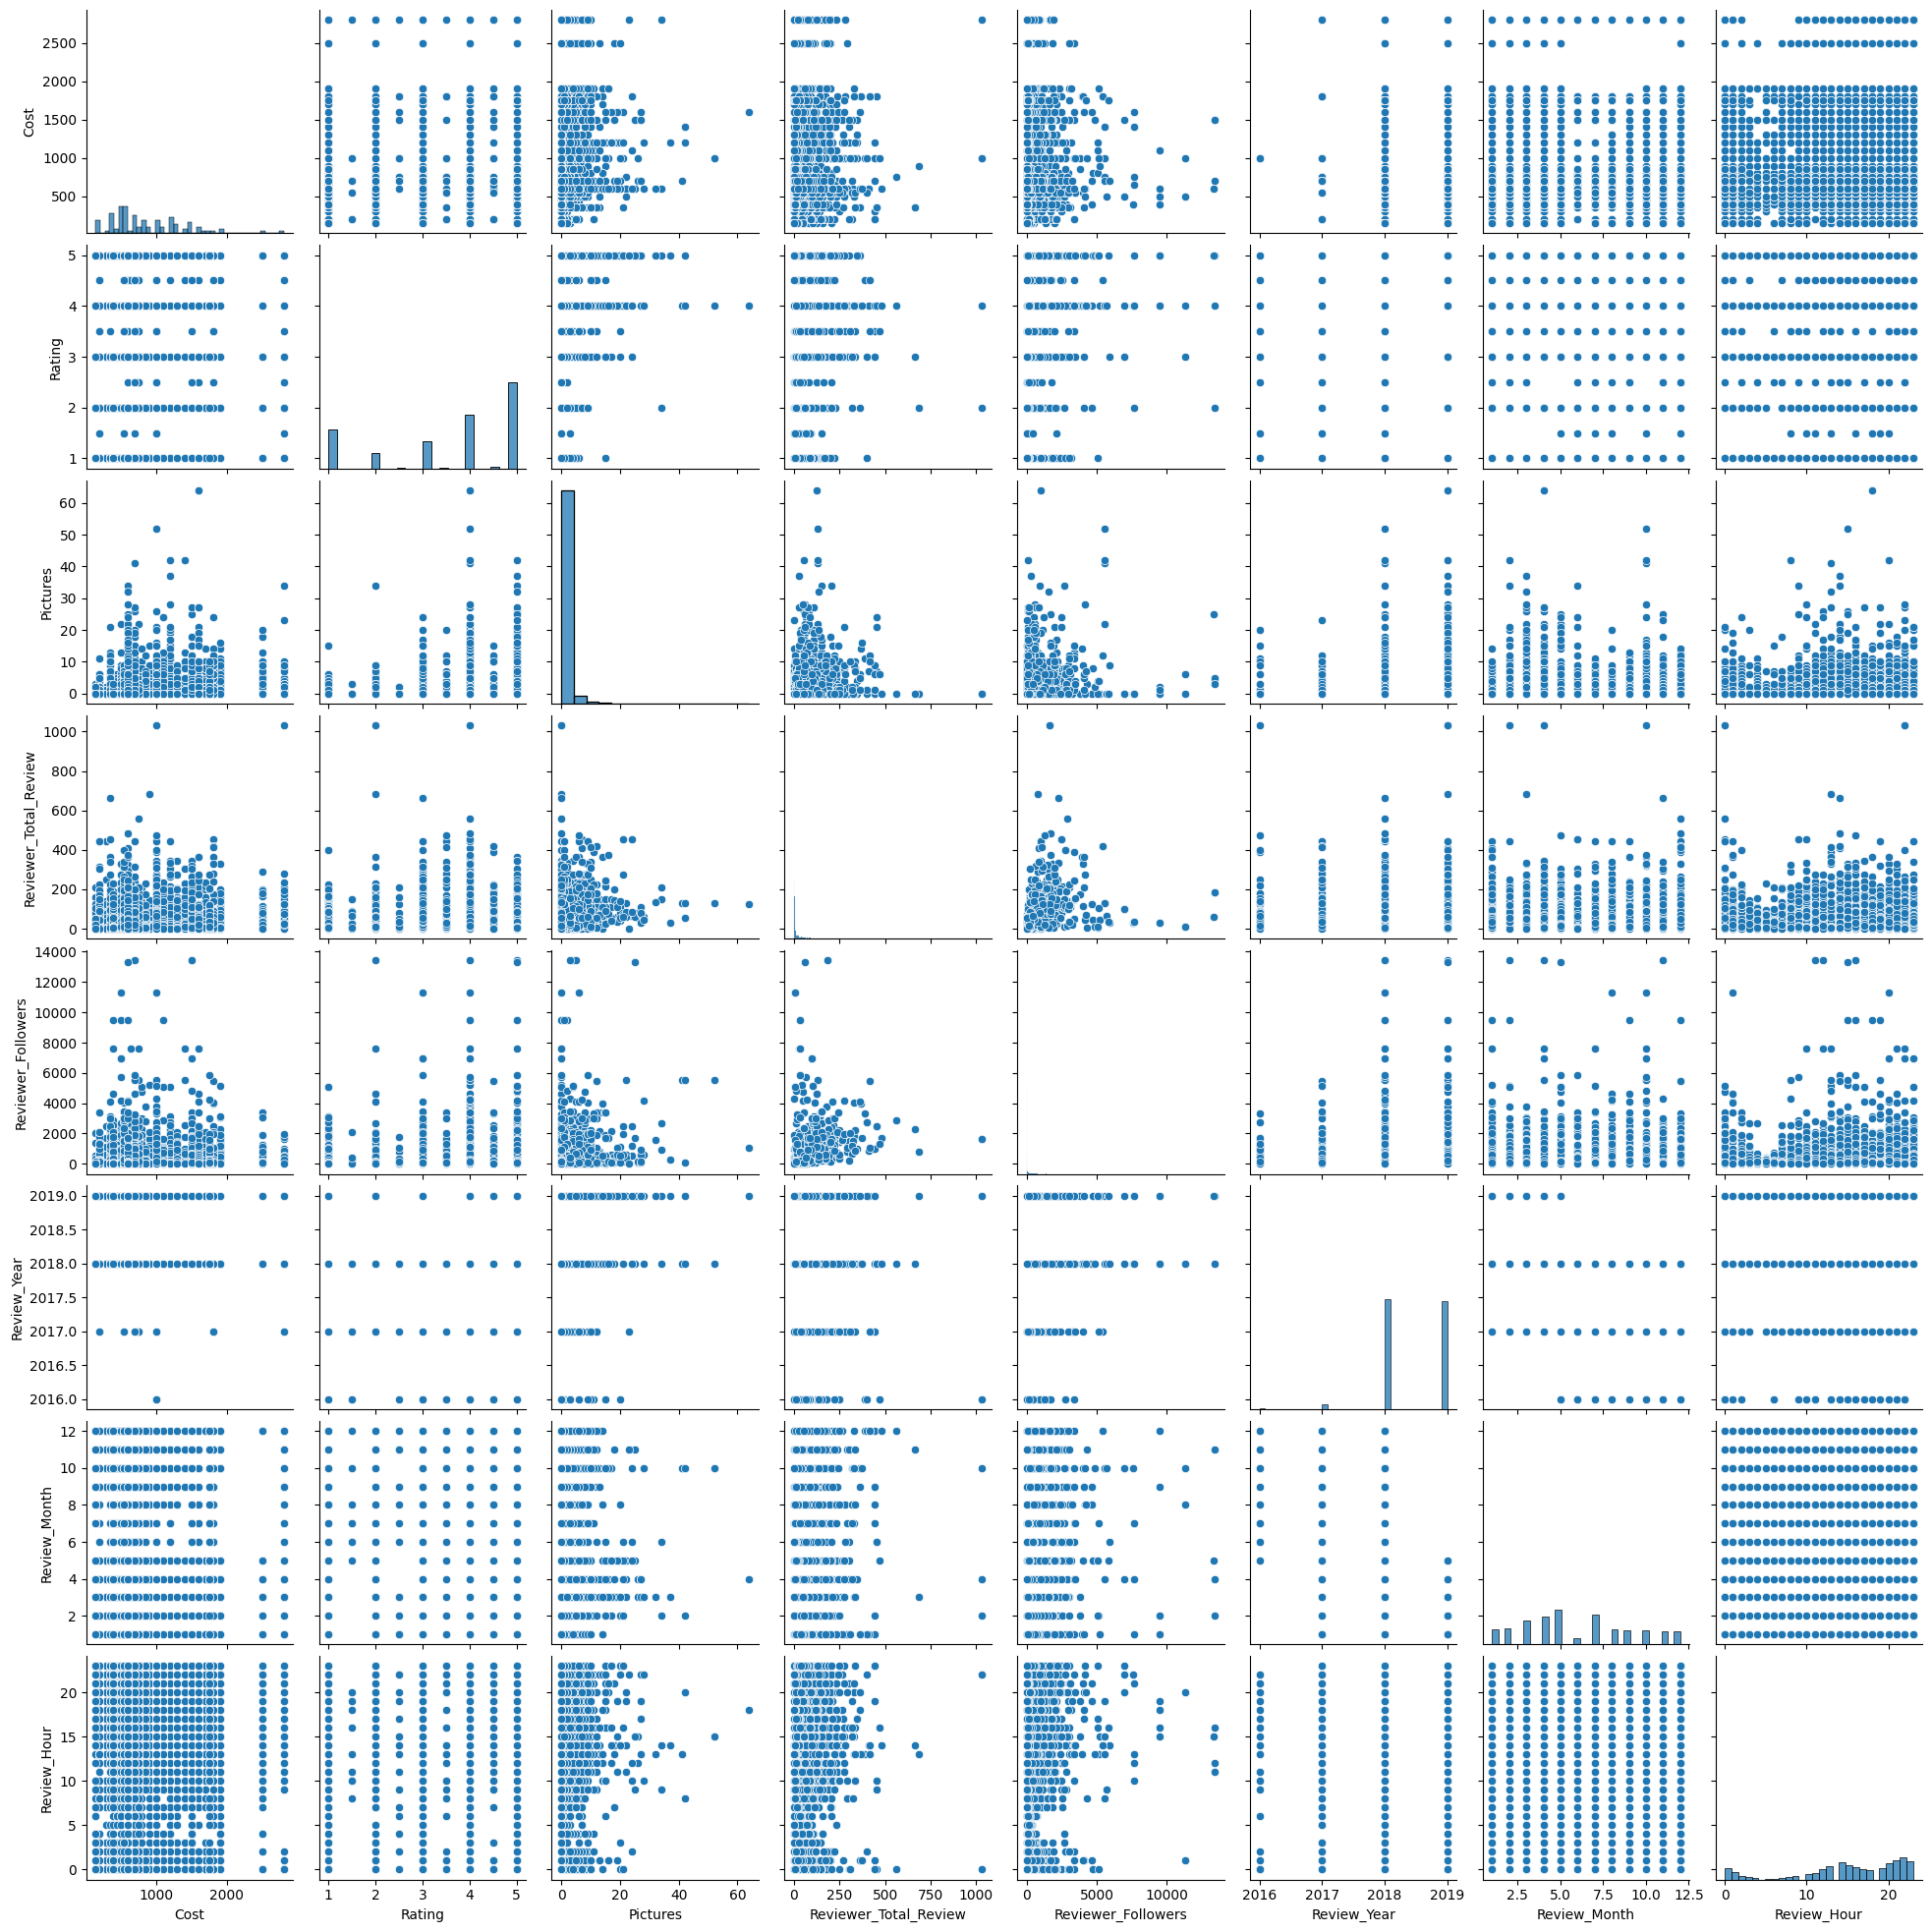

In [49]:
sns.pairplot(merged_df)

## Hypothesis Testing

**Q1 The cost of a restaurant is positively correlated with the rating it receives.**

**Q2 Restaurants that are reviewed by reviewers with more followers will have a higher rating.**

**Q3 Restaurants that offer a wider variety of cuisines will have a higher rating.**

#### Q1

* Null hypothesis: The number of followers a reviewer has has no effect on the rating of a restaurant. (H0: 𝛽1 = 0) 
* Alternative hypothesis: Alternative Hypothesis: The number of followers a reviewer has has a positive effect on the rating of a restaurant. (H1: 𝛽1 > 0)
* Test : Simple Linear Regression test

In [50]:
import statsmodels.formula.api as smf
model = smf.ols(formula='Rating ~ Cost', data= merged_df).fit()

p_value = model.pvalues[1]
print(f"p_value:{p_value}")
if p_value < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept The Null Hypothesis")

p_value:4.595644071499624e-47
Reject Null Hypothesis


#### Q2

* Null hypothesis: The number of followers a reviewer has has no effect on the rating of a restaurant. (H0: 𝛽1 = 0) 
* Alternative hypothesis: Alternative Hypothesis: The number of followers a reviewer has has a positive effect on the rating of a restaurant. (H1: 𝛽1 > 0)
* Test : Simple Linear Regression test

In [51]:

model = smf.ols(formula='Rating ~ Reviewer_Followers', data = merged_df).fit()


p_value = model.pvalues[1]
print(f"p_value:{p_value}")
if p_value < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


p_value:0.0004760318830883612
Reject Null Hypothesis


#### Q3

* Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽3 = 0)
* Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)
* Test : Chi-Squared Test


In [52]:
from scipy.stats import chi2_contingency

ct = pd.crosstab(merged_df['Cuisines'], merged_df['Rating'])

In [53]:
chi2,p_value,_,_ = chi2_contingency(ct)
print(f"p_value:{p_value}")
if p_value < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value:0.0
Reject Null Hypothesis


### Q4 Association Between Cost and Rating

Null Hypothesis (H₀): There is no relationship between 'Cost' and 'Rating'.
Alternative Hypothesis (H₁): There is a significant relationship between 'Cost' and 'Rating'

In [54]:
model = smf.ols("Cost ~ Rating",data=merged_df).fit()

In [55]:
p_value = model.pvalues[1]
print(f"p_value:{p_value}")

p_value:4.595644071498114e-47


In [56]:
if p_value < 0.05:
    print("Rject the Null Hypothesis")
else:
    print("Fail to reject the null hypothesis")

Rject the Null Hypothesis


## **Feature Engineering and Data pre-processing**

### 1.Handeling NaN values

In [57]:
print("Duplicate Values in the DataFrame")
print("Duplicate Data in Hotel DataFrame",hotel_df.duplicated().sum())
print("----------------------")
print("Duplicate Data in Review DataFrame",review_df.duplicated().sum())

Duplicate Values in the DataFrame
Duplicate Data in Hotel DataFrame 0
----------------------
Duplicate Data in Review DataFrame 36


In [58]:
review_df.drop_duplicates(inplace=True)

In [59]:
print("Null values in DataFrame")
print(hotel_df.isnull().sum())
print("---------------------------")
print(review_df.isnull().sum())

Null values in DataFrame
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64
---------------------------
Restaurant                  0
Reviewer                    2
Review                      9
Rating                      3
Metadata                    2
Time                        2
Pictures                    0
Reviewer_Total_Review       2
Reviewer_Followers       1580
Review_Year                 2
Review_Month                2
Review_Hour                 2
dtype: int64


In [60]:
# Null values in Hotel df

hotel_df[hotel_df['Timings'].isnull()]

,Name,Links,Cost,Collections,Cuisines,Timings
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN


In [61]:
hotel_df['Timings'].fillna(hotel_df['Timings'].mode()[0],inplace=True)

In [62]:
#checking null values in Collections
missing_percentage = ((hotel_df['Collections'].isnull().sum())/(len(hotel_df['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')

Percentage of missing value in Collections is 51.43%


In [63]:
#dropping collection column since has more than 50% of null values
hotel_df.drop('Collections', axis = 1, inplace = True)

In [64]:
#final checking of missing value
hotel_df.isnull().sum()

Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64

### Review Dataset

In [65]:
#review missing value
review_df.isnull().sum()

Restaurant                  0
Reviewer                    2
Review                      9
Rating                      3
Metadata                    2
Time                        2
Pictures                    0
Reviewer_Total_Review       2
Reviewer_Followers       1580
Review_Year                 2
Review_Month                2
Review_Hour                 2
dtype: int64

In [66]:
#checking null reviewer
review_df[review_df['Reviewer'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN


In [67]:
#checking null Reviewer_Total_Review
review_df[review_df['Reviewer_Total_Review'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN


In [68]:
# dropping null values in reviewer and Reviewer_Total_Review column as all values are null for those column
review = review_df.dropna(subset=['Reviewer','Reviewer_Total_Review'],inplace=True)

In [69]:
review_df.isnull().sum()

Restaurant                  0
Reviewer                    0
Review                      7
Rating                      1
Metadata                    0
Time                        0
Pictures                    0
Reviewer_Total_Review       0
Reviewer_Followers       1578
Review_Year                 0
Review_Month                0
Review_Hour                 0
dtype: int64

In [70]:
review_df[review_df['Rating'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,NaN,"12 Reviews , 21 Followers",2019-05-18 12:31:00,1,12.0,21.0,2019.0,5.0,12.0


In [71]:
review_df['Rating'].fillna(review_df['Rating'].mode()[0],inplace=True)

In [72]:
#filling null values in review and reviewer follower column
review_df.fillna({"Review": "No Review", "Reviewer_Followers": 0},inplace=True)

In [73]:
hotel_df.rename(columns={"Name":'Restaurant'},inplace=True)

In [74]:
merged_df = hotel_df.merge(review_df,on='Restaurant')

In [75]:
merged_df.shape

(9962, 16)

### 2.Handling Outliers

In [76]:
merged_df.sample()

,Restaurant,Links,Cost,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
7131,Eat India Company,https://www.zomato.com/hyderabad/eat-india-com...,1300,"North Indian, Mughlai, Beverages","12 Noon to 3 PM, 7 PM to 11 PM",Srideep Bommisetti,Too costly and food was not up to the cost qua...,1.0,"3 Reviews , 3 Followers",2019-01-07 20:58:00,0,3.0,3.0,2019.0,1.0,20.0


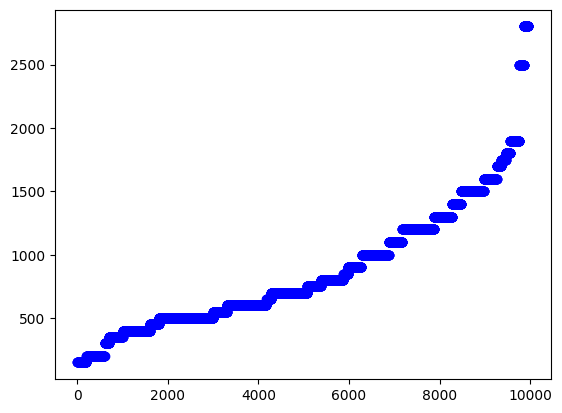

In [77]:
plt.scatter(x=merged_df.index,y=np.sort(merged_df['Cost']),color='blue')

<Axes: ylabel='Cost'>

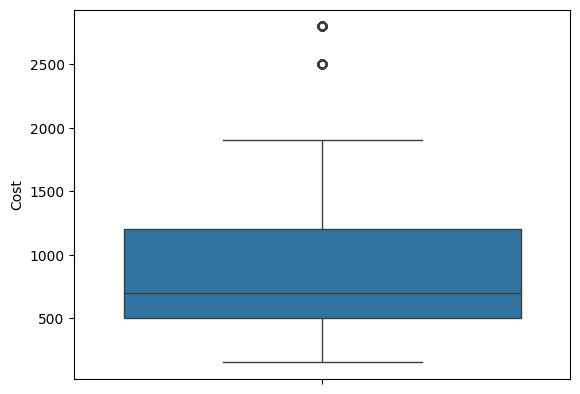

In [78]:
sns.boxplot(merged_df['Cost'])

<Axes: xlabel='Cost', ylabel='Count'>

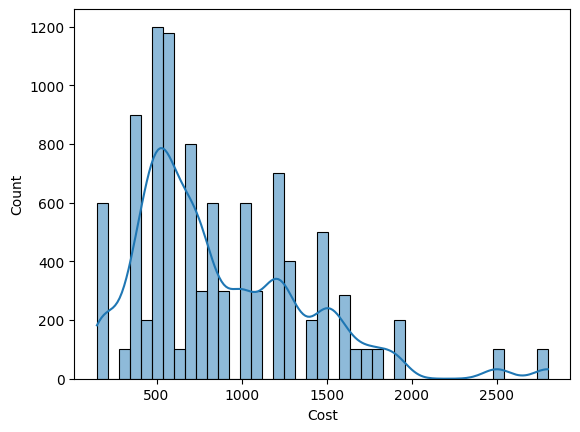

In [79]:
sns.histplot(merged_df['Cost'],kde=True)

<Axes: >

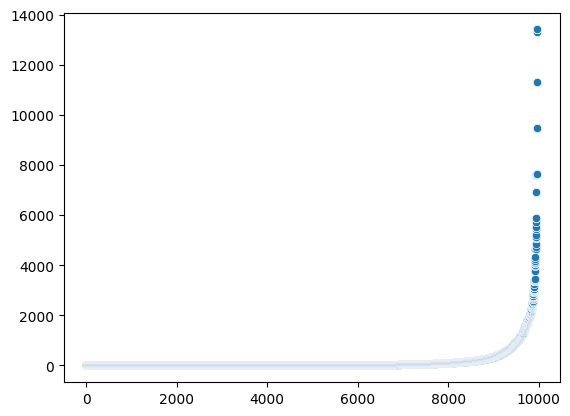

In [80]:
#plot for revier follower

sns.scatterplot(np.sort(merged_df['Reviewer_Followers']))

<Axes: ylabel='Reviewer_Followers'>

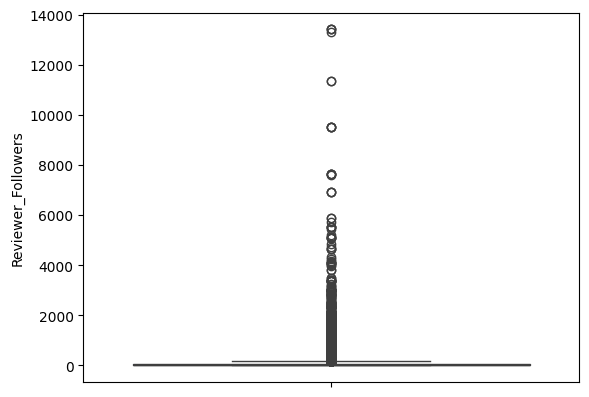

In [81]:
sns.boxplot(merged_df['Reviewer_Followers'])

<Axes: xlabel='Reviewer_Followers', ylabel='Count'>

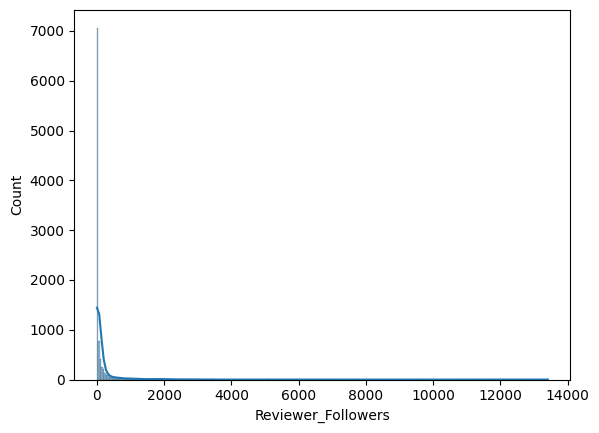

In [82]:
sns.histplot(merged_df['Reviewer_Followers'],bins=300,kde=True)

In [83]:
merged_df['Reviewer_Followers'].skew()

10.093197484373444

### Treating the outliers

IQR = Q3 - Q1
lower_range = Q1-

In [84]:
def outlier_handeling(df,feature):

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)

    IQR = Q3 - Q1

    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR

    return lower_range,upper_range

In [85]:
lower_range,upper_range = outlier_handeling(merged_df,feature="Cost")

In [86]:
merged_df['Cost'] = np.where(merged_df['Cost'] < lower_range, lower_range, merged_df['Cost'])
merged_df['Cost'] = np.where(merged_df['Cost'] > upper_range, upper_range, merged_df['Cost'])

<Axes: ylabel='Cost'>

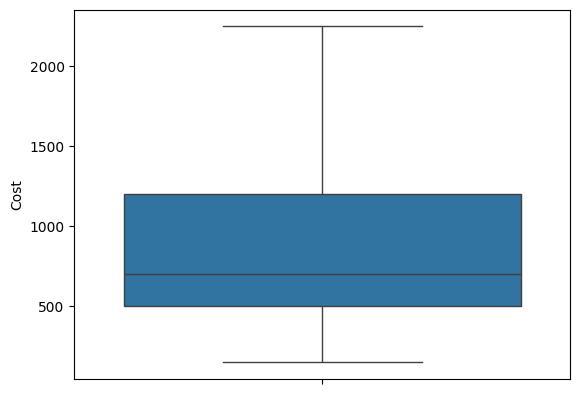

In [87]:
sns.boxplot(merged_df["Cost"])

In [88]:
# for reviewr follower column

lower_range,upper_range = outlier_handeling(merged_df,feature='Reviewer_Followers')
merged_df['Reviewer_Followers'] = np.where(merged_df['Reviewer_Followers'] < lower_range, lower_range, merged_df['Reviewer_Followers'])
merged_df['Reviewer_Followers'] = np.where(merged_df['Reviewer_Followers'] > upper_range, upper_range, merged_df['Reviewer_Followers'])

<Axes: ylabel='Reviewer_Followers'>

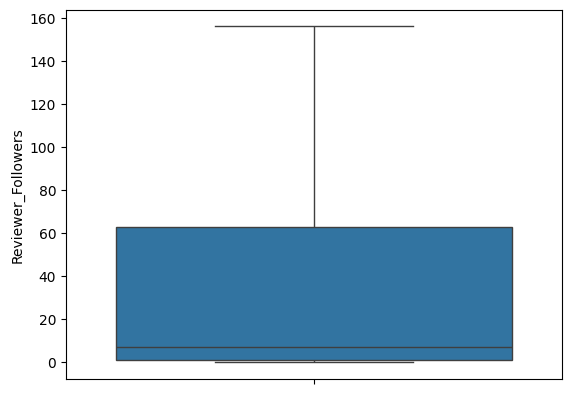

In [89]:
sns.boxplot(merged_df['Reviewer_Followers'])

## encoding the important categorical col

In [90]:
merged_df.select_dtypes(include='object').columns

Index(['Restaurant', 'Links', 'Cuisines', 'Timings', 'Reviewer', 'Review',
       'Metadata'],
      dtype='object')

In [91]:
# Encode your categorical columns

#categorial encoding using pd.getdummies
#new df with important categories
cluster_dummy = hotel_df[['Restaurant','Cuisines']]
#spliting cuisines as they are separted with comma and converting into list
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')
#using explode converting list to unique individual items
cluster_dummy = cluster_dummy.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())
#using get dummies to get dummies for cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])

#checking if the values are correct
# cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].eq(1)[:5].T
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]

#replacing cuisines_ from columns name - for better understanding run seperatly

# cluster_dummy.columns = cluster_dummy.columns.str.replace(" ","")
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")
# cluster_dummy = cluster_dummy.groupby(cluster_dummy.columns, axis=1).sum()

#grouping each restaurant as explode created unnecessary rows
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()

In [92]:
hotel_df['Total_Cuisine_Count'] = hotel_df['Cuisines'].apply(lambda x : len(x.split(',')))

In [93]:
#adding average rating - will remove 5 unrated restaurant from 105 restaurant
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
hotel = hotel_df.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
hotel.head(1)

,Restaurant,Links,Cost,Cuisines,Timings,Total_Cuisine_Count,Average_Rating
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,4.28


In [94]:
#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
hotel_df['Location'] = hotel_df['Links'].apply(get_location)
hotel_df.sample(2)

,Restaurant,Links,Cost,Cuisines,Timings,Total_Cuisine_Count,Location
65,Komatose - Holiday Inn Express & Suites,https://www.zomato.com/hyderabad/komatose-holi...,1500,"North Indian, Chinese, Japanese, Sushi",1 PM to 11 PM,4,hyderabad
80,Tandoori Food Works,https://www.zomato.com/hyderabad/tandoori-food...,500,"North Indian, Burger, Kebab","12noon to 12midnight (Mon, Tue, Wed, Thu, Sun)...",3,hyderabad


In [95]:
cluster_dummy = hotel[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count'
                      ]].merge(cluster_dummy, on = 'Restaurant')

## Textual Data preprocessing

In [96]:
#creating new df for text processing of sentiment analysis
sentiment_df = review_df[['Reviewer','Restaurant','Rating','Review']]
#analysing two random sample
sentiment_df.sample(2)

,Reviewer,Restaurant,Rating,Review
9848,Vinay,Triptify,1.0,"The food was not at all good, I have ordered c..."
650,Jaswal Paramvir Singh,eat.fit,5.0,Less quantity


In [97]:
sentiment_df = sentiment_df.reset_index()

In [98]:
sentiment_df.drop(columns=["index"],axis='columns',inplace=True)

In [99]:
import contractions
import string
import re,nltk
from nltk.corpus import stopwords
import spacy


def text_preporcess(text):

    #text contraction (e.g., "don't" for "do not", "can't" for "cannot").
    text = contractions.fix(text)

    #lower case
    text = text.lower()

    #remove punctuation
    translator = str.maketrans("","",string.punctuation)
    text = text.translate(translator)

    #remove html tags
    text = re.sub(r"http\S+", "", text).strip()

    #remove digit 
    text = re.sub(r"\d+", "", text).strip()

    # Remove the stop words
    sw = stopwords.words("english")
    text = [word for word in text.split() if word not in sw]

    # Tokenizing
    text = " ".join(text)
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    text = [token.text for token in doc]

    

    return " ".join(text)

In [100]:
text = "Hello you don't How!! https//www.com 6474 me how all the stop words are removed"
text_preporcess(text)

'hello stop words removed'

In [101]:
#sentiment_df['Review'] = sentiment_df['Review'].apply(text_preporcess)

In [102]:
#sentiment_df.to_csv("sentiment_clean_df.csv",index=False)

In [103]:
sentiment_df_clean = pd.read_csv("Data\sentiment_clean_df.csv")

In [104]:
sentiment_df_clean[sentiment_df_clean['Sentiment']=='Neutral'].shape

(745, 5)

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import 


In [263]:
vectorizer = TfidfVectorizer(max_features=1000)


In [272]:
sentiment_df_clean['Review'].dropna(inplace=True)

In [279]:
sentiment_df_clean.dropna(axis=0,inplace=True)

In [280]:
sentiment_df_clean['Review'].isnull().sum()

0

In [281]:
X = vectorizer.fit_transform(sentiment_df_clean['Review'])

In [282]:
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [205]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Tafique
[nltk_data]     Hossain Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [283]:
# Sentiment Analysis function using VADER
sid = SentimentIntensityAnalyzer()
def analyze_sentiment(review):
    score = sid.polarity_scores(review)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [284]:
sentiment_df_clean['Sentiment'] = sentiment_df_clean['Review'].apply(analyze_sentiment)

In [285]:
sentiment_df_clean.to_csv("sentiment_tag.csv",index=False)

In [286]:
sentiment_df_clean.head()

,Reviewer,Restaurant,Rating,Review,Sentiment
0,Rusha Chakraborty,Beyond Flavours,5.0,ambience good food quite good saturday lunch c...,Positive
1,Anusha Tirumalaneedi,Beyond Flavours,5.0,ambience good pleasant evening service prompt ...,Positive
2,Ashok Shekhawat,Beyond Flavours,5.0,must try great food great ambience thnx servic...,Positive
3,Swapnil Sarkar,Beyond Flavours,5.0,soumen das arun great guy behavior sincerety g...,Positive
4,Dileep,Beyond Flavours,5.0,food goodwe ordered kodi drumsticks basket mut...,Positive


In [287]:
restaurant = 'Beyond Flavours'

In [288]:
filtered_df = sentiment_df[sentiment_df['Restaurant'] == restaurant]

In [289]:
sentiment_counts = filtered_df['Sentiment'].value_counts()

In [290]:
sentiment_counts

Sentiment
Positive    85
Negative    13
Neutral      2
Name: count, dtype: int64

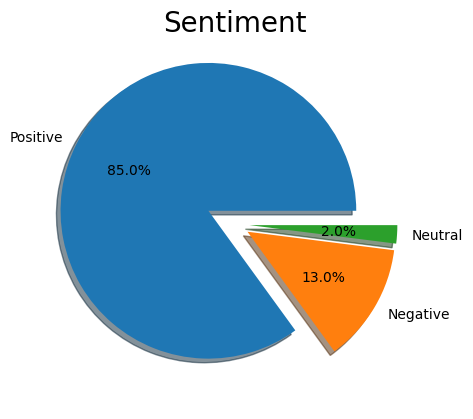

In [291]:
lable = ['Positive','Negative','Neutral']
explode = [0.2,0.1,0.1]
plt.pie(sentiment_counts,autopct="%0.1f%%",labels=lable,explode=explode,shadow=True)
plt.title("Sentiment",size=20)
plt.show()

<Axes: xlabel='Sentiment', ylabel='count'>

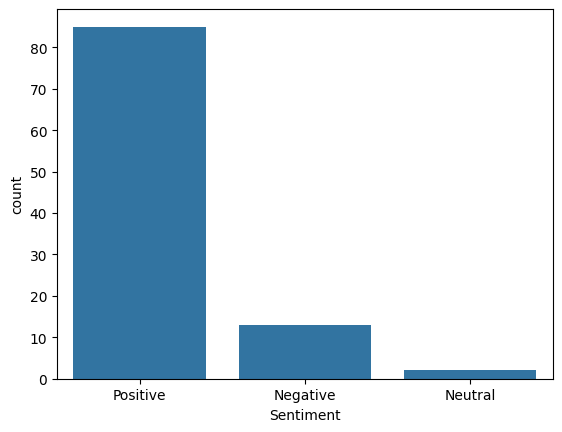

In [147]:
sns.barplot(sentiment_counts,)

## Clustering

In [148]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']

scaler = StandardScaler()
scaler.fit(cluster_dummy[numerical_cols])
scaled_df = cluster_dummy.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])

### Dimensionality Reduction using PCA

In [149]:
scaled_df.set_index(['Restaurant'],inplace=True)

In [150]:
from sklearn.decomposition import PCA

#setting restaurant feature as index as it still had categorial value

features = scaled_df.columns
pca = PCA()
pca.fit(scaled_df[features])


PCA()

(0.0, 40.0)

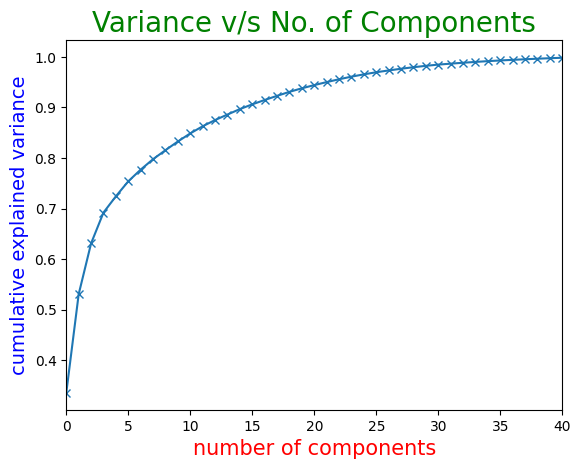

In [151]:
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker="x")
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 40])

In [152]:
pca.explained_variance_ratio_[:10]

array([0.33512175, 0.19529647, 0.10052737, 0.06107461, 0.03214328,
       0.02969182, 0.02313877, 0.02068586, 0.01781644, 0.01716292])

In [153]:
np.sum(pca.explained_variance_ratio_[:15])

0.89677029391223

In [154]:
pca = PCA(n_components=10)
pca.fit(scaled_df[features])

df_pca = pca.transform(scaled_df[features])

In [155]:
np.sum(pca.explained_variance_ratio_)

0.8326592751313967

In [156]:
#shape
print("original shape: ", scaled_df.shape)
print("transformed shape:", df_pca.shape)

original shape:  (100, 47)
transformed shape: (100, 10)


## k-mean clustering

In [157]:
from sklearn.cluster import KMeans

In [158]:

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=42)
    km.fit(df_pca)
    wcss.append(km.inertia_)

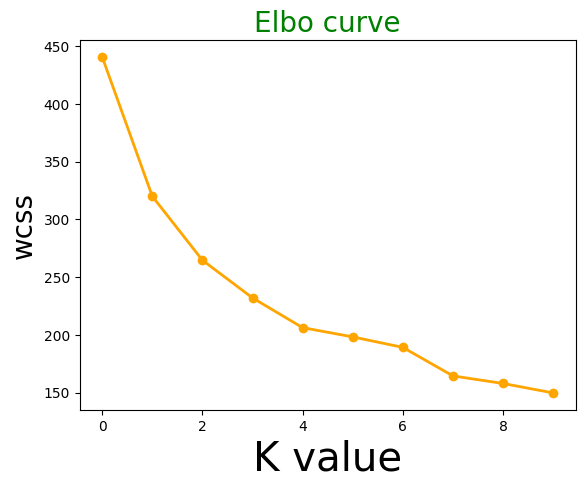

In [159]:

plt.plot(wcss,marker='o',linewidth=2,color='orange')
plt.xlabel("K value",size=29)
plt.ylabel("wcss",size=20)
plt.title("Elbo curve",size=20,color="Green")
plt.show()

In [160]:
km = KMeans(n_clusters=5,random_state=42)

In [161]:
cluster_label = km.fit_predict(df_pca)

In [162]:
df_pca = pd.DataFrame(df_pca,index=scaled_df.index)
df_pca['lable'] = cluster_label

## Recommendation system

**content based recommendation**

In [123]:
sentiment_df_clean.dropna(inplace=True)

In [134]:
review_df_for_rec = sentiment_df_clean.groupby('Restaurant')['Review'].apply(lambda x: " ".join(x)).reset_index()

In [140]:
recommend_df = pd.merge(left=cluster_dummy,right=review_df_for_rec,left_on='Restaurant',right_on='Restaurant')

In [149]:
recommend_df.drop(columns=['Cost','Total_Cuisine_Count'],axis='columns',inplace=True)

In [206]:
recommend_df.to_csv("recommend_df.csv",index=False)

In [164]:
cuisine_columns = ['American', 'Andhra', 'Arabian',
       'Asian', 'BBQ', 'Bakery', 'Beverages', 'Biryani', 'Burger', 'Cafe',
       'Chinese', 'Continental', 'Desserts', 'European', 'Fast Food',
       'Finger Food', 'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream',
       'Indonesian', 'Italian', 'Japanese', 'Juices', 'Kebab', 'Lebanese',
       'Malaysian', 'Mediterranean', 'Mexican', 'Mithai', 'Modern Indian',
       'Momos', 'Mughlai', 'North Eastern', 'North Indian', 'Pizza', 'Salad',
       'Seafood', 'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai',
       'Wraps']

#### knn

In [184]:
from sklearn.neighbors import NearestNeighbors
import numpy as np


In [201]:
def get_recommendations(user_cuisines, rating_threshold):
    # Filter restaurants based on cuisines and rating
    filtered_df = recommend_df[
        (recommend_df['Average_Rating'] >= rating_threshold) &
        (recommend_df[user_cuisines].any(axis=1))
    ]
    
    if filtered_df.empty:
        return "No recommendations found."
    
    # Create review vectors for filtered restaurants
    review_vectors = tfidf.transform(filtered_df['Review']).toarray()

    # Determine the number of neighbors based on available samples
    k = min(5, len(filtered_df))  # Ensure k doesn't exceed available samples

    # Fit KNN model with cosine distance
    knn = NearestNeighbors(n_neighbors=k, metric='cosine')
    knn.fit(review_vectors)

    # Get distances and indices of nearest neighbors
    distances, indices = knn.kneighbors(review_vectors)

    # Gather recommendations
    recommendations = []
    for i in range(len(indices)):
        for idx in indices[i]:
            recommendations.append((filtered_df.iloc[idx]['Restaurant'], distances[i][idx]))

    # Sort recommendations by distance (closest first)
    recommendations = sorted(set(recommendations), key=lambda x: x[1])
    
    # Return unique hotel names sorted by their distances
    unique_recommended_hotels = {rec[0]: rec[1] for rec in recommendations}
    return unique_recommended_hotels


In [292]:
user_cuisines = ['Hyderabadi','Asian']  # User's desired cuisines
rating_threshold = 4.0  # User's desired minimum average rating

# Get recommendations
recommended_hotels = get_recommendations(user_cuisines, rating_threshold)


In [293]:
list(recommended_hotels.keys())[:5]

['Flechazo',
 'Over The Moon Brew Company',
 "The Fisherman's Wharf",
 'Mazzo - Marriott Executive Apartments',
 'Feast - Sheraton Hyderabad Hotel']

## Review-Based Restaurant Similarity Recommendation

In [258]:
def get_review_similarity_recommendations(selected_restaurant):
    # Generate TF-IDF vectors for the reviews
    tfidf = TfidfVectorizer(max_features=500)
    review_vectors = tfidf.fit_transform(recommend_df['Review']).toarray()

    # Compute cosine similarity between all reviews
    cosine_sim = cosine_similarity(review_vectors)

    # Get the index of the selected restaurant
    selected_index = recommend_df[recommend_df['Restaurant'] == selected_restaurant].index[0]

    # Get similarity scores for the selected restaurant, excluding the selected restaurant itself
    sim_scores = list(enumerate(cosine_sim[selected_index]))
    sim_scores = [(i, score) for i, score in sim_scores if i != selected_index]  # Exclude the selected restaurant

    # Sort the restaurants based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[:5]  # Get top 5 similar restaurants

    # Get restaurant names and similarity scores
    similar_restaurants = [(recommend_df.iloc[i]['Restaurant'], score) for i, score in sim_scores]
    
    return similar_restaurants


In [260]:
ans = get_review_similarity_recommendations('Paradise')

In [281]:
hotel_name = []
for i_set in ans:
    hotel_name.append(i_set[0])

In [282]:
hotel_name

['Al Saba Restaurant',
 'Hyderabad Chefs',
 'Beyond Flavours',
 'Khaan Saab',
 'Olive Garden']

## Cuisine-Based Restaurant Recommendation

In [289]:
def cuisine_based_recommendation(recommend_df, rating_threshold, user_cuisines):
        # Filter DataFrame based on user cuisines and rating
        filtered_df = recommend_df[
            (recommend_df['Average_Rating'] >= rating_threshold) &
            (hotel_df['Cuisines'].apply(lambda x: any(cuisine in x for cuisine in user_cuisines)))
        ]

        # Sort by rating or other criteria if desired (optional)
        filtered_df = filtered_df.sort_values(by='Average_Rating', ascending=False)

        # Extract top 5 recommended restaurant names
        recommendations = filtered_df['Restaurant'].head(5).tolist()

        return recommendations

In [290]:
user_cuisines = ['Indian', 'Chinese']
rating_threshold = 4.0

In [291]:
cuisine_based_recommendation(recommend_df=recommend_df,user_cuisines=user_cuisines,rating_threshold=rating_threshold)

["AB's - Absolute Barbecues",
 "3B's - Buddies, Bar & Barbecue",
 'Paradise',
 'Flechazo',
 'The Indi Grill']